<a href="https://colab.research.google.com/github/emilliewbr-14/emilliewbr-14/blob/main/Damper_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Use this block before anything else
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#***MOTION RATIO***

In [2]:
#Cálculo pelas distâncias
def MRdist(d1, d2):
  '''
  Inputs:
  d1 = distance between each end of the damper
  d2 = half the damper size
  Output:
  MRdist = motion ratio
  '''
  return d1/d2

In [4]:
#Cálculo pela variação
def MRvar(wt, st):
  '''
  Inputs:
  wt = wheel travel
  st = spring travel
  Output:
  MRvar = Motion ratio
  ref: apostila chassis sim
  '''
  return wt / st

In [5]:
#Cálculo pelo balancim
def MRbalancim(a, b, theta):
  '''
  Inputs:
  a = distance between the rocker and the Prod
  b = distance between the rocker and the damper
  theta = angle between the Prod and the ground

  ref: apostila chassis sim
  '''
  MRbalancim = float((a / b) * (math.sin(math.radians(theta))))
  return MRbalancim

#***SPRING RATE***

In [6]:
#Cálculo da constante elástica da mola pelo curso do amortecedor
def Kcursoamort(Wmax, a, C):
  '''
  Inputs:
  Wmax = mass of the heaviest quarter of the car (in Kg)
  a = porcentagem do curso do amortecedor comprimido
  C = curso máx do amortecedor (in mm)
  '''
  Kcursoamort = float(Wmax / (a * C))
  return Kcursoamort

Kcursoamort(70, 25, 15)

0.18666666666666668

In [ ]:
#Cálculo da constante elástica da mola pelo Wheel Rate
def KWH(Mcar, WR): #WR em N/mm
  KWH = float((Mcar / 4) * (((((WR * 1000) / (Mcar / 4)) ** 1/2)) ** 2))
  return KWH

KWH(280, 0.05)

8.928571428571429

In [ ]:
#Cálculo do Spring Rate
def SR(K, x1, x2): #K = cte elást. da mola; x1 = tamanho de 80% da mola; x2 = tamanho de 20% da mola
  SR = float(((K * x2) - (K * x1)) / (x2 - x1))
  return SR

SR(0.18666666666666668, 128, 32)

0.18666666666666668

#***WHEEL RATE & RIDE RATE***

In [ ]:
#Cálculo do Wheel Rate:
def WR(SR, MR):
  '''
  cálculo do wheel rate. rigidez da massa suspensa em relação ao centro da roda
  inputs
    SR - spring rate [N/m]
    MR - motion ratio [admensional]
  outputs:
    WR - wheel rate [N/m]

  ref: gillespie cap 5
  '''
  WR = float(SR * ((MR)**2))
  return WR

In [ ]:
def RR(WR, TR):
  '''
  cáculo  do ride rate. rigidez da massa suspensa do carro em relação ao chão. associação em série da mola do conjunto amortecedor e a rigidez radial(longitudinal) do pneu
  inputs:
    WR - wheel rate [N/m]
    TR - Tyre rate [N/m]
  outputs:
    RR - ride rate [N/m]

  ref: gillespie cap. 5
  '''
  RR = WR * TR / (WR + TR)
  return RR

In [ ]:
WR(0.18666666666666668, 0.6426177079062341)

0.07708540345607023

#***DAMPING RATES***

In [ ]:
#Cálculo do Damping Ratio
def DR(F, x, K, M):
  '''Inputs:
  F = Força que está sendo exercida pelo amortecedor  [N]
  x = curso do amortecedor [m]
  K = constante elástica da mola [N/m]
  M = massa suspensa do carro [Kg]
    Output:
  DR = Damping Ratio
  '''
  DR = float((F / x) / ((4 * K* M)**1/2))
  return DR

In [ ]:
#Cálculo da de Damping Force (F)
def F(p, V):
  '''
Cálculo da Damping Force (F)
    Inputs:
p = viscous damping coefficient [N.s/m]
V = velocity of the object [m/s]
    Output:
F = damping force [N]
  '''
  F = -(p*V)
  return F

In [ ]:
def DRcoefficient(C, WR, M):
  '''
  calculo do damping ratio a atraves do damping coefficient
  inputs:
    C - damping coefficient [admnesional]
    WR - wheel rate [N/m]
    M - massa suspens [kg]
  output:
    DR - damping ratio [admensional]

  ref: gillespie cap. 5
  '''
  DR = C / (4*WR*M)**0.5
  return DR

#***NATURAL FREQUENCY***

In [ ]:
def undampNF(RR, M):
  '''
  calculo da frequencia natural não amortecida
  inputs:
    M - massa suspensa [kg]
    RR - ride rate [N/m]
  outputs:
    uNF - frequencia natural não amortecida [rad/s]

  ref: gillespie cap. 5
  '''
  uNF = (RR/M)**0.5
  return uNF

In [ ]:
def dampNF(DR, uNF):
  '''
  cálculo da frequencia natural amortecida
  inputs:
    DR - damping rate (amortecimento) [admensional]
    uNF - frequência natural não amortecida [rad/s]
  outputs:
    dNF - frequência natural amortecida [rad/s]

  ref: gillespie cap 5
  '''
  dNF = uNF * (1-DR**2)**0.5
  return dNF


#***SIMULAÇÃO***

In [ ]:
# k da mola
Ks = 73.4401 #650 lbf/in
#damping coefficient
C = 0.4
# massa suspensa
m = 280/4
# k do pneu
Kt = 2*10**6


#balancim
a = 70
b = 50
theta = 60

In [ ]:
motion_ratio = MRbalancim(a, b, theta)
motion_ratio

1.212435565298214

In [ ]:
wheel_rate = WR(Ks, motion_ratio)
wheel_rate

107.95694699999997

In [ ]:
ride_rate = RR(wheel_rate, Kt)
ride_rate

107.95111996333173

In [ ]:
f_n_amortecida = undampNF(ride_rate,m)
f_n_amortecida

1.2418368880891826

In [ ]:
amortecimento = DRcoefficient(C, wheel_rate, m)
amortecimento

0.002300677146541915

In [ ]:
f_amortecida = dampNF(amortecimento, f_n_amortecida)
f_amortecida

1.241833601491897

#***DESIGN OF EXPERIMENTS***

## random

In [ ]:
def DRcoefficient(C, WR, M):
  '''
  calculo do damping ratio a atraves do damping coefficient
  inputs:
    C - damping coefficient [admnesional]
    WR - wheel rate [N/m]
    M - massa suspens [kg]
  output:
    DR - damping ratio [admensional]

  ref: gillespie cap. 5
  '''
  DR = (C*((4*WR*M)**0.5)) / ((4*WR*M)**0.5)
  return DR

In [ ]:
# prompt: design of experiments

import itertools
import numpy as np
import pandas as pd

n = 1000

# Define the parameters and their ranges
parameters = {
    "spring_rate": np.random.uniform(20, 100, n),
    "damper_coefficient": np.random.uniform(0.1, 1, n),
    "mass": np.random.uniform(250/4, 350/4, n),
    "tyre_rate": np.random.uniform(20*10, 100*10, n),
    "motion_ratio": np.random.uniform(0.1, 2, n)
}

# Create a list of all possible combinations of parameters



# Create a DataFrame to store the results
results = pd.DataFrame(columns=["spring_rate", "damper_coefficient", "mass", "tyre_rate","motion_ratio", "wheel_rate", "ride_rate", "f_n_amortecida", "amortecimento", "f_amortecida"])

# Simulate the system for each combination of parameters
for ii in range(n):
    keys = parameters.keys()
    combination = [parameters[k][ii] for k in keys]
    # Calculate the wheel rate
    wheel_rate = WR(combination[0], combination[4])

    ride_rate = RR(wheel_rate, combination[3])

    f_n_amortecida = undampNF(ride_rate, combination[2])

    amortecimento = DRcoefficient(combination[1], wheel_rate, combination[2])

    # Calculate the natural frequency
    f_amortecida = dampNF(amortecimento, f_n_amortecida)
    #natural_frequency = np.sqrt(combination[0] / combination[2])

    # Add the results to the DataFrame
    results.loc[len(results)] = list(combination) + [wheel_rate]+[ride_rate]+[f_n_amortecida]+[amortecimento]+[f_amortecida]

# Print the results
print(results)



     spring_rate  damper_coefficient       mass   tyre_rate  motion_ratio  \
0      98.410841            0.662914  81.189484  292.208881      1.843158   
1      39.731119            0.858458  69.468371  229.371027      0.459147   
2      57.660614            0.353224  69.272572  541.965195      0.231838   
3      75.474521            0.490130  65.065714  815.647896      0.648028   
4      98.710062            0.273004  67.824068  779.232668      1.365704   
..           ...                 ...        ...         ...           ...   
995    93.010565            0.590354  85.517451  918.392761      0.360019   
996    60.820989            0.576182  82.023933  857.440146      1.391907   
997    49.769573            0.939708  82.348812  962.067657      0.174943   
998    98.427526            0.996630  76.182047  847.421672      0.912551   
999    31.921836            0.971918  81.015037  892.606228      0.899983   

     wheel_rate   ride_rate  f_n_amortecida  amortecimento  f_amortecida  


## permutação - NÃO EXECUTAR

In [ ]:
# prompt: design of experiments

import itertools
import numpy as np
import pandas as pd

# Define the parameters and their ranges
parameters = {
    "spring_rate": np.linspace(20, 100, 10),
    "damper_coefficient": np.linspace(0.1, 2, 10),
    "mass": np.linspace(250/4, 350/4, 10),
    "tyre_rate": np.linspace(20*10, 100*10, 10),
    "motion_ratio": np.linspace(0.1, 2, 10)
}

# Create a list of all possible combinations of parameters
combinations = list(itertools.product(*parameters.values()))



# Create a DataFrame to store the results
results = pd.DataFrame(columns=["spring_rate", "damper_coefficient", "mass", "tyre_rate","motion_ratio", "wheel_rate", "ride_rate", "f_n_amortecida", "amortecimento", "f_amortecida"])

# Simulate the system for each combination of parameters
for combination in combinations:
    # Calculate the wheel rate
    wheel_rate = WR(combination[0], combination[4])

    ride_rate = RR(wheel_rate, combination[3])

    f_n_amortecida = undampNF(ride_rate, combination[2])

    amortecimento = DRcoefficient(combination[1], wheel_rate, combination[2])

    # Calculate the natural frequency
    f_amortecida = dampNF(amortecimento, f_n_amortecida)
    #natural_frequency = np.sqrt(combination[0] / combination[2])

    # Add the results to the DataFrame
    results.loc[len(results)] = list(combination) + [wheel_rate]+[ride_rate]+[f_n_amortecida]+[amortecimento]+[f_amortecida]

# Print the results
print(results)


KeyboardInterrupt: ignored

## gráficos


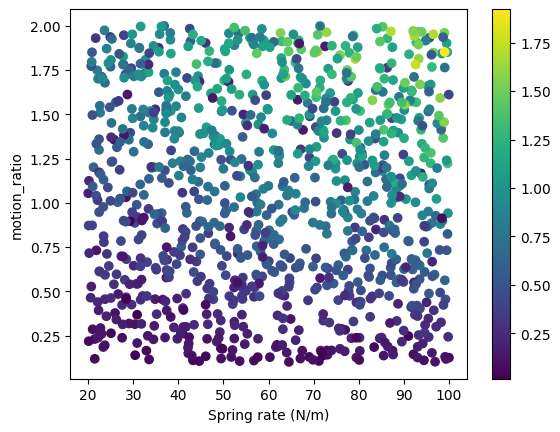

In [ ]:
# Plot the natural frequency as a function of spring rate and damper rate
plt.scatter(results["spring_rate"], results["motion_ratio"], c=results["f_amortecida"])
plt.xlabel("Spring rate (N/m)")
plt.ylabel("motion_ratio")
plt.colorbar()
plt.show()

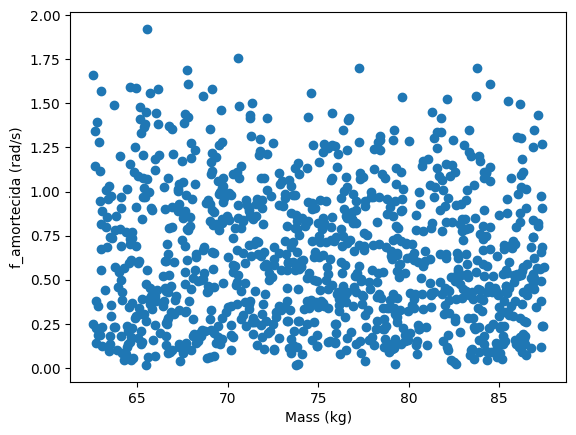

In [ ]:
# prompt: plot the design of experiments

# Plot the natural frequency as a function of mass
plt.scatter(results["mass"], results["f_amortecida"])
plt.xlabel("Mass (kg)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()


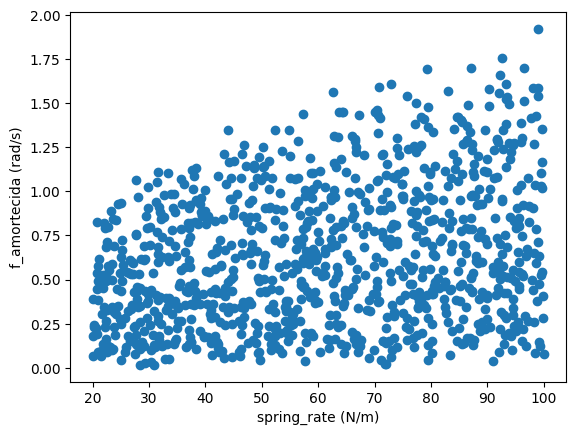

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["spring_rate"], results["f_amortecida"])
plt.xlabel("spring_rate (N/m)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

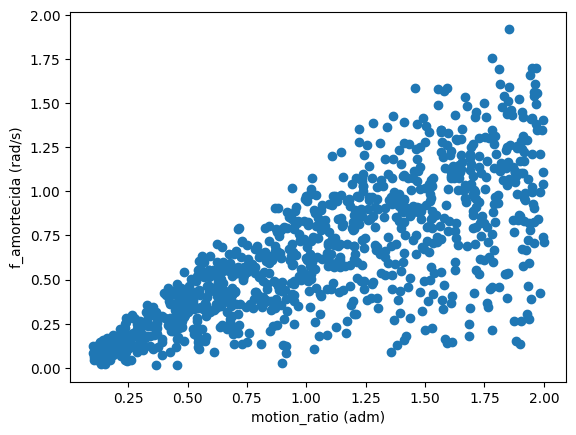

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["motion_ratio"], results["f_amortecida"])
plt.xlabel("motion_ratio (adm)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

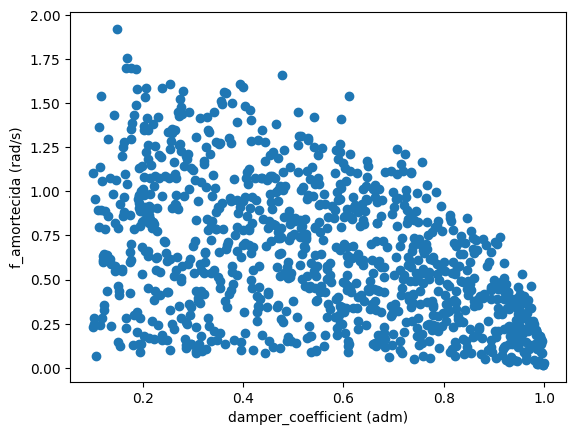

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["damper_coefficient"], results["f_amortecida"])
plt.xlabel("damper_coefficient (adm)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

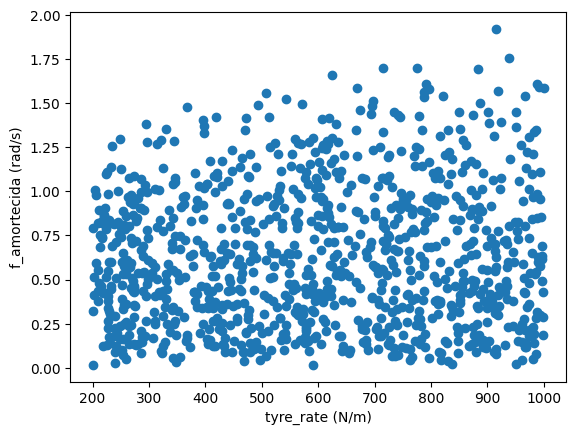

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["tyre_rate"], results["f_amortecida"])
plt.xlabel("tyre_rate (N/m)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

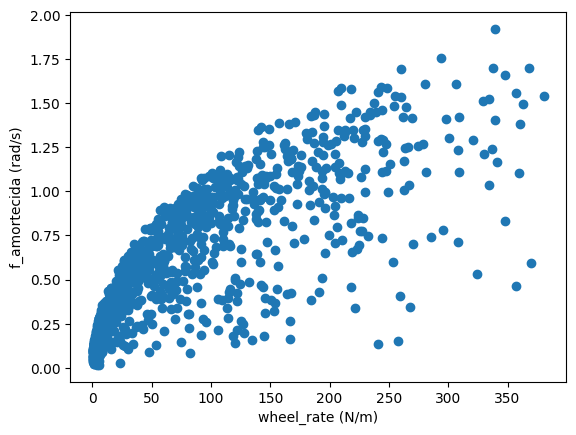

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["wheel_rate"], results["f_amortecida"])
plt.xlabel("wheel_rate (N/m)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

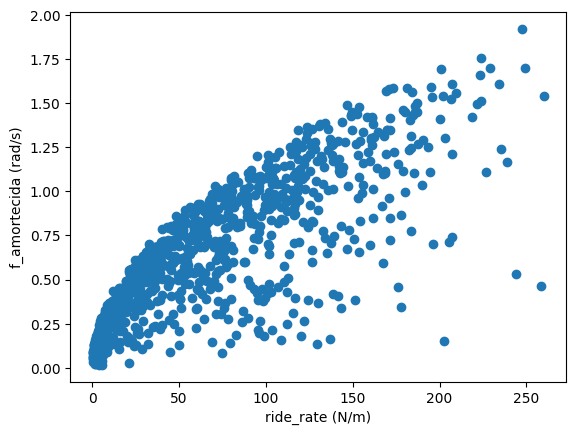

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["ride_rate"], results["f_amortecida"])
plt.xlabel("ride_rate (N/m)")
plt.ylabel("f_amortecida (rad/s)")
plt.show()

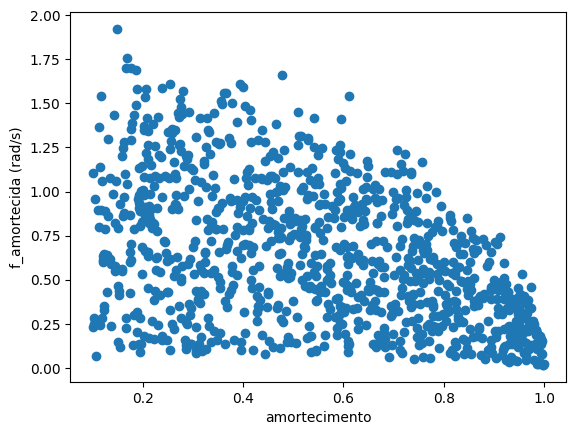

In [ ]:
# Plot the natural frequency as a function of mass
plt.scatter(results["amortecimento"], results["f_amortecida"])
plt.xlabel("amortecimento")
plt.ylabel("f_amortecida (rad/s)")
plt.show()